Candy Power Rating - Lidl

**Importing Libraries**

In [1]:
#to handle datasets
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
#for subpressing warnings
import warnings
from IPython.display import display
#to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') # ignore warnings.

In [2]:
#to install chardet library
#!conda install --yes chardet

In [3]:
#checking encoding of data
import chardet

rawdata = open('candy-data.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)
print(result) # It's utf-8 with 99% confidence.

utf-8
{'language': '', 'confidence': 0.99, 'encoding': 'utf-8'}


In [4]:
# load dataset
data = pd.read_csv("candy-data.csv")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,84.18
1,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,81.87
2,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,81.64
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,76.77
4,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,76.67


We have a total of 12 variables that describe a chocolate. 9 of them are categorical and the rest 3 are numerical variables.
1. chocolate: Does it contain chocolate?
2. fruity: Is it fruit flavored?
3. caramel: Is there caramel in the candy?
4. peanutalmondy: Does it contain peanuts, peanut butter or almonds?
5. nougat: Does it contain nougat?
6. crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
7. hard: Is it a hard candy?
8. bar: Is it a candy bar?
9. pluribus: Is it one of many candies in a bag or box?
10. sugarpercent: The percentile of sugar it falls under within the data set.
11. pricepercent: The unit price percentile compared to the rest of the set.
12. winpercent: The overall win percentage according to 269,000 matchups.

In [5]:
#get all the missing values
data.isnull().sum()# No missing values

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [6]:
#Scaling
data['winpercent'] = data['winpercent']/100
#Numeric variable - Round of to 2 decimal
data['sugarpercent'] = round(data['sugarpercent'],2)
data['pricepercent'] = round(data['pricepercent'],2)
data['winpercent'] = round(data['winpercent'],2)
# Special character was appearing in name of candy.
data['competitorname'] = data['competitorname'].str.replace('Õ', "'") 

In [7]:
#top 10 candy by winpercentage
data.sort_values(by=['winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,0.84
2,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,0.82
1,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,0.82
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,0.77
4,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,0.77
5,Reese's pieces,1,0,0,1,0,0,0,0,1,0.41,0.65,0.73
6,Milky Way,1,0,1,0,1,0,0,1,0,0.60,0.65,0.73
7,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,0.73
8,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.82,0.65,0.71
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.60,0.77,0.71


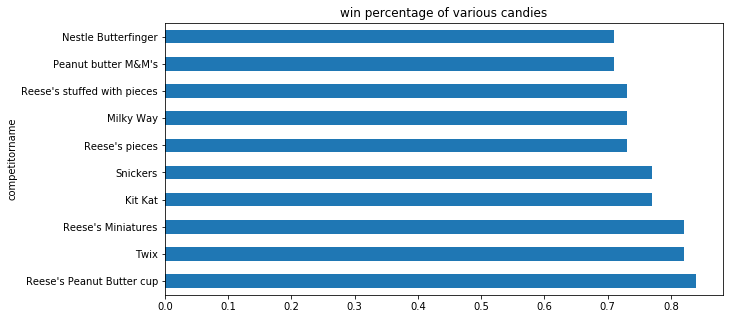

In [8]:
popularity = data[['competitorname','winpercent']].sort_values(by='winpercent',ascending=False)
popularity.head(10).plot(x='competitorname',y='winpercent',kind='barh',title='win percentage of various candies',sort_columns=True,figsize = (10,5),legend=False)
plt.show()

In [9]:
#worst 10 candy by winpercentage
data.sort_values(by=['winpercent'], ascending=True).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
84,Nik L Nip,0,1,0,0,0,0,0,0,1,0.20,0.98,0.22
83,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.31,0.51,0.23
82,Chiclets,0,1,0,0,0,0,0,0,1,0.05,0.32,0.25
81,Super Bubble,0,1,0,0,0,0,0,0,0,0.16,0.12,0.27
80,Jawbusters,0,1,0,0,0,0,1,0,1,0.09,0.51,0.28
79,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30
78,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.42,0.32,0.32
77,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
76,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,0.33
75,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.47,0.47,0.34


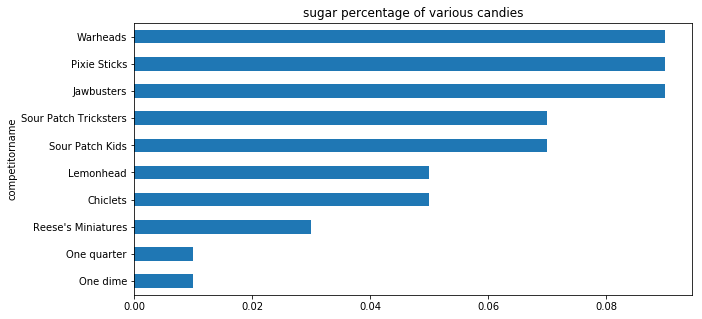

In [10]:
popularity = data[['competitorname','sugarpercent']].sort_values(by='sugarpercent')
popularity.head(10).plot(x='competitorname',y='sugarpercent',kind='barh',title='sugar percentage of various candies',sort_columns=True,figsize = (10,5),legend=False)
plt.show()

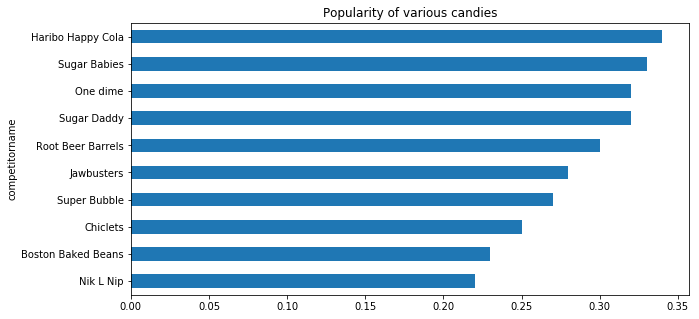

In [11]:
popularity = data[['competitorname','winpercent']].sort_values(by='winpercent')
popularity.head(10).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)
plt.show()

In [12]:
#top 3 candy without chocolate
(data[data['chocolate']==0]).sort_values(by=['winpercent'], ascending=False).head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
12,Starburst,0,1,0,0,0,0,0,0,1,0.15,0.22,0.67
18,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63
21,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60


In [13]:
data.sort_values(by=['sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
7,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,0.73
76,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,0.33
17,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.96,0.86,0.64
30,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,0.55
18,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63
66,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,0.38
36,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52
44,Gobstopper,0,1,0,0,0,0,1,0,1,0.91,0.45,0.47
45,Mike & Ike,0,1,0,0,0,0,0,0,1,0.87,0.32,0.46
40,Whoppers,1,0,0,0,0,1,0,0,1,0.87,0.85,0.50


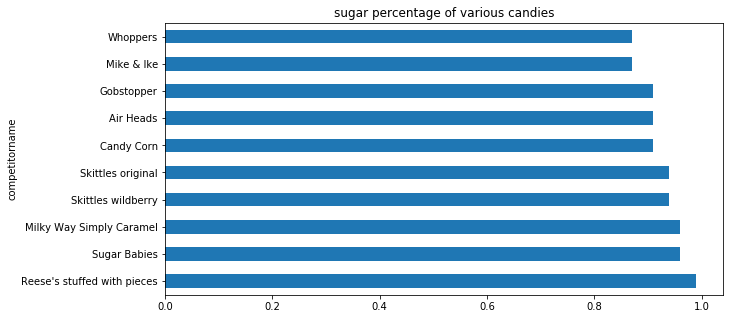

In [14]:
popularity = data[['competitorname','sugarpercent']].sort_values(by='sugarpercent',ascending=False)
popularity.head(10).plot(x='competitorname',y='sugarpercent',kind='barh',title='sugar percentage of various candies',sort_columns=True,figsize = (10,5),legend=False)
plt.show()

In [15]:
data.sort_values(by=['sugarpercent'], ascending=True).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
77,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
47,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46
1,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,0.82
82,Chiclets,0,1,0,0,0,0,0,0,1,0.05,0.32,0.25
63,Lemonhead,0,1,0,0,0,0,1,0,0,0.05,0.10,0.39
21,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60
35,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,0.53
80,Jawbusters,0,1,0,0,0,0,1,0,1,0.09,0.51,0.28
68,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38
64,Warheads,0,1,0,0,0,0,1,0,0,0.09,0.12,0.39


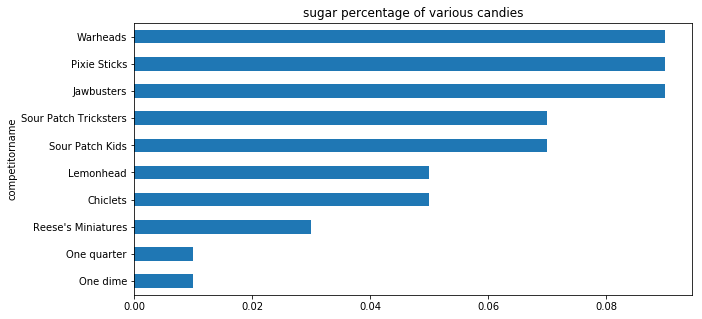

In [16]:
popularity = data[['competitorname','sugarpercent']].sort_values(by='sugarpercent',ascending=True)
popularity.head(10).plot(x='competitorname',y='sugarpercent',kind='barh',title='sugar percentage of various candies',sort_columns=True,figsize = (10,5),legend=False)
plt.show()

**Deriving new features**

In [17]:
data['sugarbyprice'] = round(data['sugarpercent'].div(data['pricepercent']),2) # higher value means the candy is sweet as well as cheap.
data['winbyprice'] = round(data['winpercent'].div(data['pricepercent']),2) # higher value means the candy is more liked as well as cheap.
categorival_vars = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar',
                    'pluribus']
numerical_vars = ['sugarpercent', 'pricepercent', 'winpercent', 'sugarbyprice', 'winbyprice']
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,0.84,1.11,1.29
1,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,0.82,0.11,2.93
2,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,0.82,0.60,0.90
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,0.77,0.61,1.51
4,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,0.77,0.85,1.18


In [18]:
data.sort_values(by=['winbyprice'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
49,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,0.46,17.00,46.00
68,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38,4.50,19.00
52,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,0.43,4.33,14.33
60,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,0.39,24.33,13.00
28,Hershey's Kisses,1,0,0,0,0,0,0,0,1,0.13,0.09,0.55,1.44,6.11
73,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,0.35,9.50,5.83
21,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,0.60,0.58,5.00
35,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,0.53,0.58,4.42
72,Sixlets,1,0,0,0,0,0,0,0,1,0.22,0.08,0.35,2.75,4.38
79,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30,10.43,4.29


Tootsie Roll Midgies seems to perform better when price and win percentages are taken.

In [19]:
data.sort_values(by=['sugarbyprice'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
60,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,0.39,24.33,13.00
49,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,0.46,17.00,46.00
79,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30,10.43,4.29
73,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,0.35,9.50,5.83
69,Red vines,0,1,0,0,0,0,0,0,1,0.58,0.12,0.37,4.83,3.08
68,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38,4.50,19.00
52,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,0.43,4.33,14.33
18,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,0.63,4.27,2.86
30,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,0.55,4.27,2.50
54,Runts,0,1,0,0,0,0,1,0,1,0.87,0.28,0.43,3.11,1.54


Dum Dums seems to perform better when price and sugar percentages are considered.

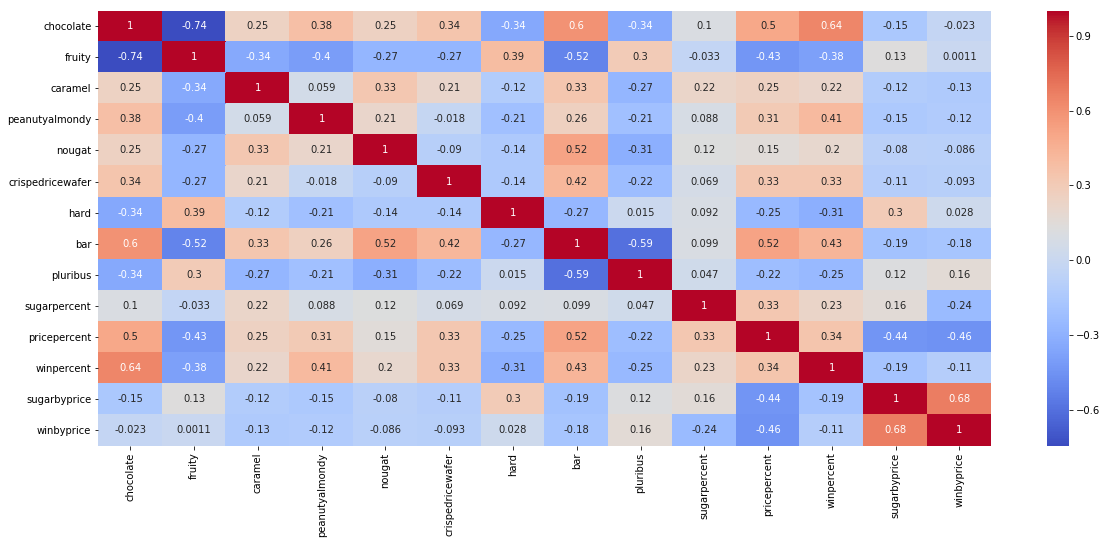

In [20]:
plt.figure(figsize = (20,8))        
sns.heatmap(data.corr(),annot=True, cmap = 'coolwarm')
plt.show()

In [21]:
def corrank(X):
    import itertools
    data = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return data.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
print(corrank(data).head(10))

       Feature1      Feature2      corr
0     chocolate        fruity  0.741721
1  sugarbyprice    winbyprice  0.677425
2     chocolate    winpercent  0.639681
3     chocolate           bar  0.597421
4           bar      pluribus  0.593409
5        nougat           bar  0.522976
6           bar  pricepercent  0.518465
7        fruity           bar  0.515066
8     chocolate  pricepercent  0.503134
9  pricepercent    winbyprice  0.455610


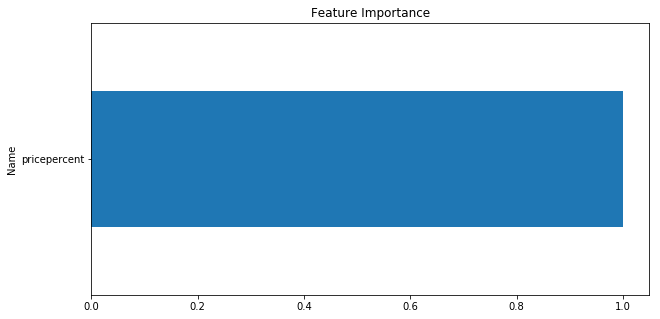

In [22]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(data[data.columns[1:-1]],data[data.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':data.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)
plt.show()

**Clustering of Data**

According to Hopkin's Statstic to check if the data is clusterable or not. If it is less than 0.5, clusters are not statistically significant.

In [23]:
#Data Scaling before clustering

data_clustering=data.drop(['competitorname',], axis=1)

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(data_clustering)

0.8526316625209642

Yes, Hopkin's statistic claims that this data is indeed highly clusterable.

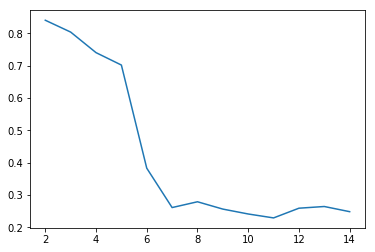

In [25]:
from sklearn.cluster import KMeans # import.

# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(data):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(data) # fit.
        sse_.append([k, silhouette_score(data, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
    plt.show()

sil_score(data_clustering)

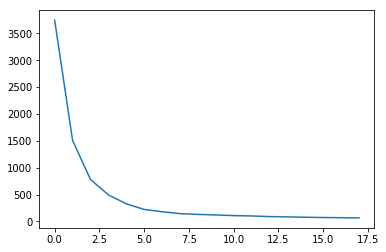

In [26]:
# sum of squared distances.

def plot_ssd(df):
    ssd = []
    for num_clusters in list(range(1,19)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=123)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)
    plt.plot(ssd)
    plt.show()
    
plot_ssd(data_clustering)

Elbow seems to form at 5.

In [27]:
# K-means with K=5.
km5c = KMeans(n_clusters=5, max_iter=50, random_state=123)
km5c.fit(data_clustering)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [28]:
# creation of data frame with original features for analysis of clusters formed.

data_dummy = pd.DataFrame.copy(data)
dfkm5c = pd.concat([data_dummy, pd.Series(km5c.labels_)], axis=1) # df-dataframe, km-kmeans, 5c-5clusters.
dfkm5c.rename(columns={0:'Cluster ID'}, inplace=True)
dfkm5c.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice,Cluster ID
0,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,0.84,1.11,1.29,0
1,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,0.82,0.11,2.93,0
2,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,0.82,0.60,0.90,0
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,0.77,0.61,1.51,0
4,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,0.77,0.85,1.18,0


In [29]:
# creation of data frame with features as principal components for analysis of clusters formed.

df_dummy = pd.DataFrame.copy(pd.DataFrame(data_clustering))
dfpcakm5c = pd.concat([df_dummy, pd.Series(km5c.labels_)], axis=1)
dfpcakm5c.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14', 'Cluster ID']

In [30]:
dfkm5c.groupby('Cluster ID').count()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,,
0,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [31]:
dfkm5c.groupby('Cluster ID').mean().round(2)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
Cluster ID,,,,,,,,,,,,,,
0,0.46,0.44,0.18,0.18,0.09,0.09,0.15,0.27,0.49,0.48,0.50,0.51,1.19,1.51
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,0.01,0.46,17.00,46.00
2,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.11,0.02,0.40,4.42,16.66
3,0.00,0.50,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.65,0.06,0.32,9.96,5.06
4,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.73,0.03,0.39,24.33,13.00


In [32]:
dfkm5c[dfkm5c['Cluster ID']!=0]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice,Cluster ID
49,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,0.46,17.00,46.00,1
52,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,0.43,4.33,14.33,2
60,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,0.39,24.33,13.00,4
68,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,0.38,4.50,19.00,2
73,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,0.35,9.50,5.83,3
79,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,0.30,10.43,4.29,3


1. It is to be noted that only Cluster ID 4 (Dum Dums) and 1 (Tootsie Roll Midgies) are far away from Cluster ID 0.
2. 'Dum Dums' and 'Tootsie Roll Midgies' are sort of opposite of each other. The first one is fruity and the second one chocolaty.
3. Cluster ID 0 contains competitors which are mostly chocolaty, sugary and more favourable. Cluster ID 1, although being chocolaty has a low sugar percentile.
4. All the chocolates which don't belong to Cluster ID 0 have made the top 10 list of `winbyprice`. They are all cheap.

In [33]:
#segregating Dependent and Independent variables
data = data.drop(["sugarbyprice","winbyprice"], axis=1)
X = data.iloc[:, 1:12].values
y = data.iloc[:, 12].values

**Linear Regression model**

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the results
y_pred=regressor.predict(X_test)
print(y_pred)
print(y_test)

[0.37677205 0.6191955  0.39494209 0.42732076 0.5483254  0.66807028
 0.3434644  0.47706344 0.51216342 0.62956534 0.518773   0.42965809
 0.60641363 0.60023529 0.4005309  0.76230832 0.48505929]
[0.46 0.71 0.32 0.55 0.82 0.82 0.39 0.36 0.55 0.73 0.56 0.6  0.66 0.84
 0.39 0.6  0.37]


In [36]:
#Building the optimal model using backward elimination with signifcant level as 0.05(5%)
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((85,1)).astype(int),values=X, axis=1)

In [37]:
#Regression with all the IDV--11IDV
X_opt=X[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     7.906
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.43e-09
Time:                        00:29:05   Log-Likelihood:                 75.887
No. Observations:                  85   AIC:                            -127.8
Df Residuals:                      73   BIC:                            -98.46
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3438      0.043      7.965      0.000       0.258       0.430
x1             0.1992      0.039      5.117      0.000       0.122       0.277
x2             0.0941      0.038      2.504      0.015       0.019       0.169
x3             0.0235      0.037      0.642      0.523      -0.049       0.096
x4             0.1004      0.036      2.779      0.007       0.028       0.172
x5             0.0090      0.057      0.158      0.875      -0.105       0.123
x6             0.0907      0.053      1.723      0.089      -0.014       0.196
x7            -0.0606      0.035     -1.755      0.083      -0.129       0.008
x8             0.0051      0.051      0.101      0.920      -0.096       0.106
x9            -0.0077      0.030     -0.252      0.802      -0.068       0.053
x10            0.0911      0.047      1.956      0.054      -0.002       0.184
x11           -0.0614      0.055     -1.118      0.267      -0.171       0.048
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.910
Skew:                          -0.078   Prob(JB):                        0.634
Kurtosis:                       2.518   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Removing x8 as it has the maximum p-value--10IDV
X_opt=X[:,[0,1,2,3,4,5,6,7,9,10,11]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     8.813
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.41e-09
Time:                        00:29:05   Log-Likelihood:                 75.881
No. Observations:                  85   AIC:                            -129.8
Df Residuals:                      74   BIC:                            -102.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3445      0.042      8.137      0.000       0.260       0.429
x1             0.2001      0.038      5.293      0.000       0.125       0.275
x2             0.0940      0.037      2.519      0.014       0.020       0.168
x3             0.0232      0.036      0.642      0.523      -0.049       0.095
x4             0.1002      0.036      2.797      0.007       0.029       0.172
x5             0.0120      0.049      0.247      0.805      -0.085       0.109
x6             0.0926      0.049      1.904      0.061      -0.004       0.190
x7            -0.0609      0.034     -1.784      0.078      -0.129       0.007
x8            -0.0091      0.027     -0.338      0.736      -0.063       0.044
x9             0.0909      0.046      1.967      0.053      -0.001       0.183
x10           -0.0597      0.052     -1.150      0.254      -0.163       0.044
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.925
Skew:                          -0.085   Prob(JB):                        0.630
Kurtosis:                       2.518   Cond. No.                         8.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Removing x5 as it has the maximum p-value--9IDV
X_opt=X[:,[0,1,2,3,4,6,7,9,10,11]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     9.910
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.54e-10
Time:                        00:29:05   Log-Likelihood:                 75.846
No. Observations:                  85   AIC:                            -131.7
Df Residuals:                      75   BIC:                            -107.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3457      0.042      8.272      0.000       0.262       0.429
x1             0.2008      0.037      5.364      0.000       0.126       0.275
x2             0.0937      0.037      2.527      0.014       0.020       0.168
x3             0.0254      0.035      0.728      0.469      -0.044       0.095
x4             0.1008      0.036      2.836      0.006       0.030       0.172
x5             0.0895      0.047      1.916      0.059      -0.004       0.183
x6            -0.0617      0.034     -1.824      0.072      -0.129       0.006
x7            -0.0107      0.026     -0.414      0.680      -0.062       0.041
x8             0.0920      0.046      2.014      0.048       0.001       0.183
x9            -0.0600      0.052     -1.165      0.248      -0.163       0.043
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.972
Skew:                          -0.078   Prob(JB):                        0.615
Kurtosis:                       2.500   Cond. No.                         8.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Removing x7 as it has the maximum p-value--8IDV
X_opt=X[:,[0,1,2,3,4,6,7,10,11]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     11.25
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.32e-10
Time:                        00:29:05   Log-Likelihood:                 75.749
No. Observations:                  85   AIC:                            -133.5
Df Residuals:                      76   BIC:                            -111.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3388      0.038      8.888      0.000       0.263       0.415
x1             0.2032      0.037      5.527      0.000       0.130       0.276
x2             0.0934      0.037      2.535      0.013       0.020       0.167
x3             0.0285      0.034      0.842      0.403      -0.039       0.096
x4             0.1027      0.035      2.931      0.004       0.033       0.172
x5             0.0917      0.046      1.987      0.051      -0.000       0.184
x6            -0.0592      0.033     -1.790      0.078      -0.125       0.007
x7             0.0887      0.045      1.983      0.051      -0.000       0.178
x8            -0.0588      0.051     -1.150      0.254      -0.161       0.043
==============================================================================
Omnibus:                        0.938   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.938
Skew:                          -0.091   Prob(JB):                        0.626
Kurtosis:                       2.518   Cond. No.                         7.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Removing x3 as it has the maximum p-value--7IDV
X_opt=X[:,[0,1,2,4,6,7,10,11]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     12.80
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.58e-11
Time:                        00:29:05   Log-Likelihood:                 75.355
No. Observations:                  85   AIC:                            -134.7
Df Residuals:                      77   BIC:                            -115.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3432      0.038      9.104      0.000       0.268       0.418
x1             0.2016      0.037      5.502      0.000       0.129       0.275
x2             0.0857      0.036      2.406      0.019       0.015       0.157
x3             0.1000      0.035      2.871      0.005       0.031       0.169
x4             0.0957      0.046      2.088      0.040       0.004       0.187
x5            -0.0596      0.033     -1.806      0.075      -0.125       0.006
x6             0.0962      0.044      2.199      0.031       0.009       0.183
x7            -0.0565      0.051     -1.108      0.271      -0.158       0.045
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.732
Skew:                          -0.069   Prob(JB):                        0.694
Kurtosis:                       2.567   Cond. No.                         7.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Removing x7 as it has the maximum p-value--6IDV
X_opt=X[:,[0,1,2,4,6,7,10]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()
#Adjusted R-square value decrased from 0.493 to 0.492 when shifting from 7 IDV to 6 IDV so model with the below 7 IDV looks to be a good bet.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     14.69
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.76e-11
Time:                        00:29:05   Log-Likelihood:                 74.682
No. Observations:                  85   AIC:                            -135.4
Df Residuals:                      78   BIC:                            -118.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3281      0.035      9.320      0.000       0.258       0.398
x1             0.1930      0.036      5.381      0.000       0.122       0.264
x2             0.0884      0.036      2.483      0.015       0.018       0.159
x3             0.0941      0.034      2.731      0.008       0.026       0.163
x4             0.0848      0.045      1.892      0.062      -0.004       0.174
x5            -0.0557      0.033     -1.693      0.094      -0.121       0.010
x6             0.0801      0.041      1.938      0.056      -0.002       0.162
==============================================================================
Omnibus:                        0.427   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.585
Skew:                          -0.068   Prob(JB):                        0.746
Kurtosis:                       2.617   Cond. No.                         6.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#The model performs best with 7 IDV
X_opt=X[:,[0,1,2,4,6,7,10,11]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     12.80
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.58e-11
Time:                        00:29:05   Log-Likelihood:                 75.355
No. Observations:                  85   AIC:                            -134.7
Df Residuals:                      77   BIC:                            -115.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3432      0.038      9.104      0.000       0.268       0.418
x1             0.2016      0.037      5.502      0.000       0.129       0.275
x2             0.0857      0.036      2.406      0.019       0.015       0.157
x3             0.1000      0.035      2.871      0.005       0.031       0.169
x4             0.0957      0.046      2.088      0.040       0.004       0.187
x5            -0.0596      0.033     -1.806      0.075      -0.125       0.006
x6             0.0962      0.044      2.199      0.031       0.009       0.183
x7            -0.0565      0.051     -1.108      0.271      -0.158       0.045
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.732
Skew:                          -0.069   Prob(JB):                        0.694
Kurtosis:                       2.567   Cond. No.                         7.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#x1=(index=1)=chocolate
#x2=(index=2)=fruity
#x3=(index=4)=peanutyalmondy
#x4=(index=6)=crispedricewafer
#x5=(index=7)=hard
#x6=(index=10)=sugarpercentage
#x7=(index=11)=pricepercentage

# From the cofficient value it can be derived that price and hard has negative corelation with win percentage. So these substances need to be avioded.
# chocolate, fruity,peanutyalomdy, crispedricewater has positive relation with win percentage so a candy with this behaviour can create more value for customer.
#Predicting the results
X_train=X_train[:,[0,1,3,5,6,9,10]]
X_test=X_test[:,[0,1,3,5,6,9,10]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_newmodel=regressor.predict(X_test)


| Y_test|Y_pred(1st model)|loss|loss-square(11 IDV)|Y_pred(after back propagation)|loss|loss-sqaure(7 IDV)|
| --- | --- | --- | --- | --- | --- | --- |
| 45.74|59.14|13.40|179.65|58.56|12.82|164.31|
| 33.44|37.75|4.31|18.57|39.47|6.03|36.34|
| 81.64|57.67|-23.97|574.75|60.15|-21.49|461.88|
| 41.39|45.78|4.39|19.30|46.00|4.61|21.26|
| 52.34|48.92|-3.42|11.72|48.26|-4.09|16.69|
| 41.90|27.42|-14.49|209.85|30.50|-11.41|130.13|
| 76.67|60.25|-16.42|269.73|67.81|-8.86|78.50|
| 44.38|44.94|0.57|0.32|44.91|0.54|0.29|
| 54.53|65.23|10.71|114.64|63.15|8.62|74.30|
| 59.86|44.37|-15.49|239.94|44.66|-15.21|231.20|
| 23.42|50.15|26.73|714.64|48.34|24.92|621.05|
| 71.47|72.33|0.87|0.75|70.29|-1.17|1.37|
| 29.70|38.74|9.03|81.63|37.28|7.57|57.33|
| 34.72|58.93|24.21|586.05|58.28|23.56|555.13|
| 60.80|51.38|-9.42|88.66|59.33|-1.47|2.16|
| 73.10|48.06|-25.04|626.88|56.15|-16.95|287.22|
| 27.30|45.20|17.89|320.12|45.49|18.18|330.56|
|Sum|||4057.22|||3069.72|